 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns_data = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
# YOUR CODE HERE
whale_returns_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_returns_data.dropna(inplace=True)
whale_returns_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns_data = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_data.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
# YOUR CODE HERE
algo_returns_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
algo_returns_data.dropna(inplace=True)
algo_returns_data.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history_data = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history_data.sort_index(inplace=True)
sp500_history_data.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
# YOUR CODE HERE
sp500_history_data.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# YOUR CODE HERE
sp500_history_data['Close'] = sp500_history_data['Close'].str.replace('$','')
sp500_history_data['Close'] = sp500_history_data['Close'].astype('float')
sp500_history_data.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_returns_data = sp500_history_data.pct_change()
sp500_returns_data.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
# YOUR CODE HERE
sp500_returns_data.isnull().sum()
sp500_returns_data.dropna(inplace=True)
sp500_returns_data.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename Column
# YOUR CODE HERE
sp500_returns_data = sp500_returns_data.rename(columns={'Close':'S&P 500'})
sp500_returns_data.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_returns = pd.concat([whale_returns_data, algo_returns_data, sp500_returns_data], axis='columns',join='inner')
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

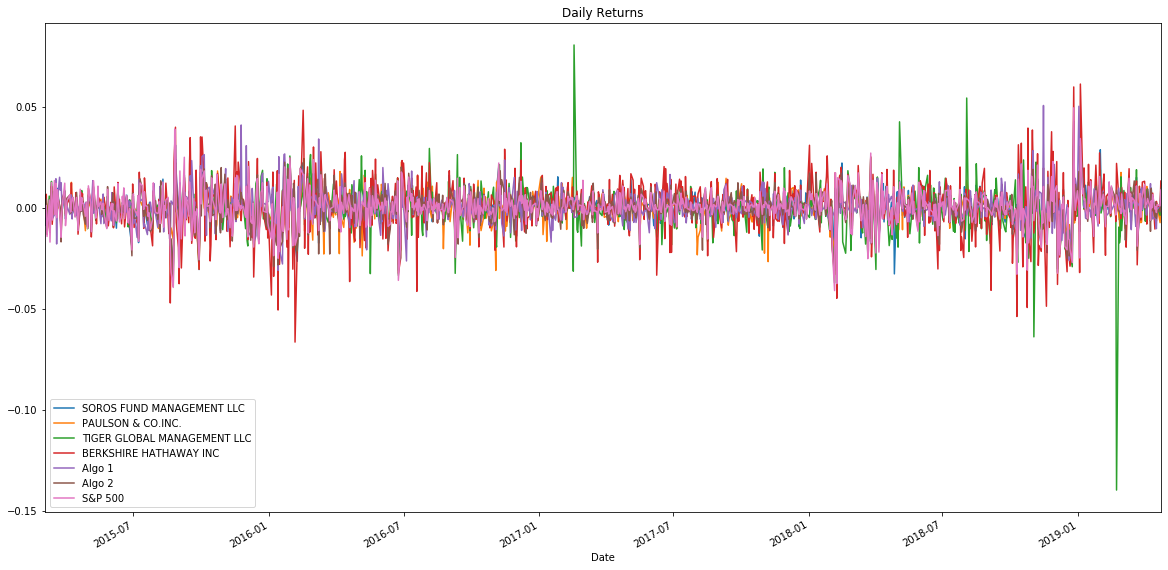

In [15]:
# Plot daily returns
# YOUR CODE HERE
combined_returns.plot(title='Daily Returns', figsize=[20,10])

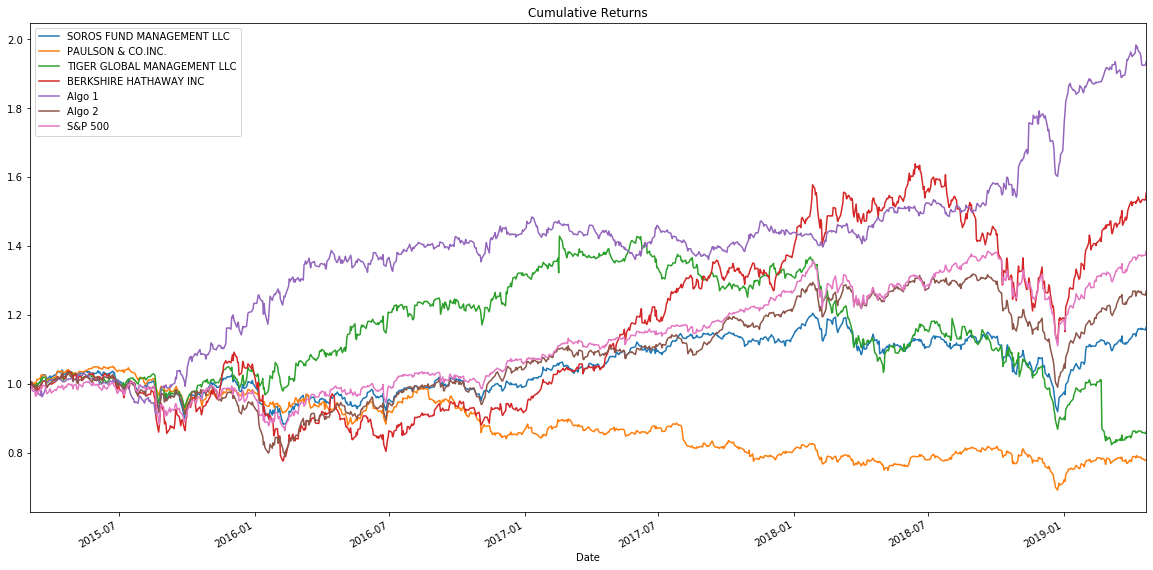

In [16]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_returns).cumprod()
cumulative_returns.head()
cumulative_returns.plot(title='Cumulative Returns',figsize=(20,10))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

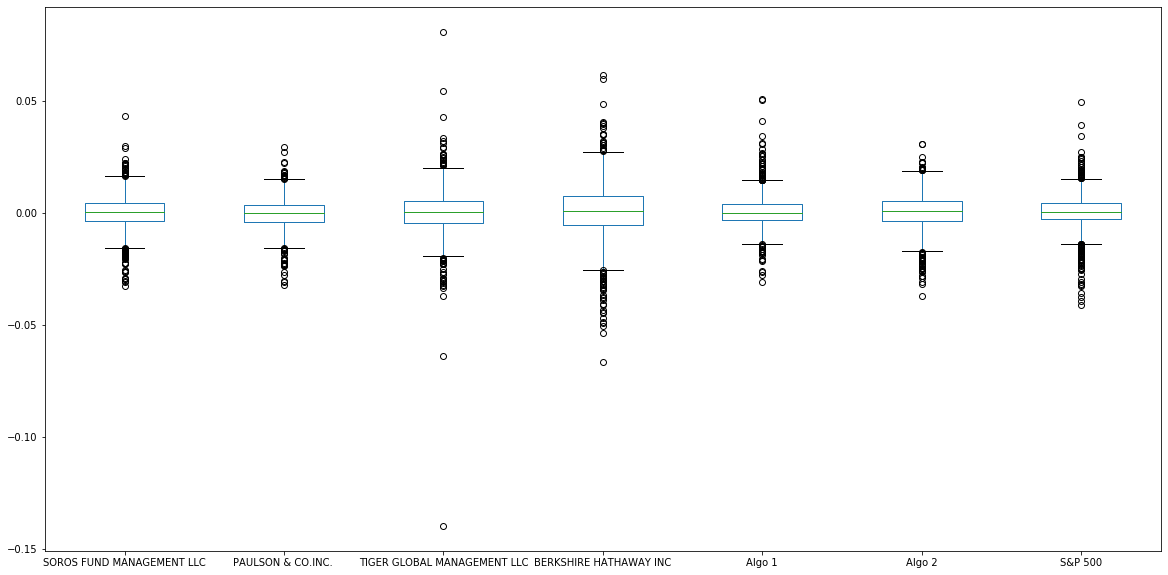

In [46]:
# Box plot to visually show risk
# YOUR CODE HERE
combined_returns.plot.box(figsize=(20,10))

In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
daily_std = combined_returns.std()
daily_std.head(10)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [32]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
risky_port = daily_std.where(daily_std < 0.008554, 'riskier')
risky_port

SOROS FUND MANAGEMENT LLC      0.00789537
PAULSON & CO.INC.              0.00702308
TIGER GLOBAL MANAGEMENT LLC       riskier
BERKSHIRE HATHAWAY INC            riskier
Algo 1                          0.0076202
Algo 2                         0.00834227
S&P 500                        0.00855373
dtype: object

In [97]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = daily_std * np.sqrt(252)
annualized_std.head(10)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
2. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?

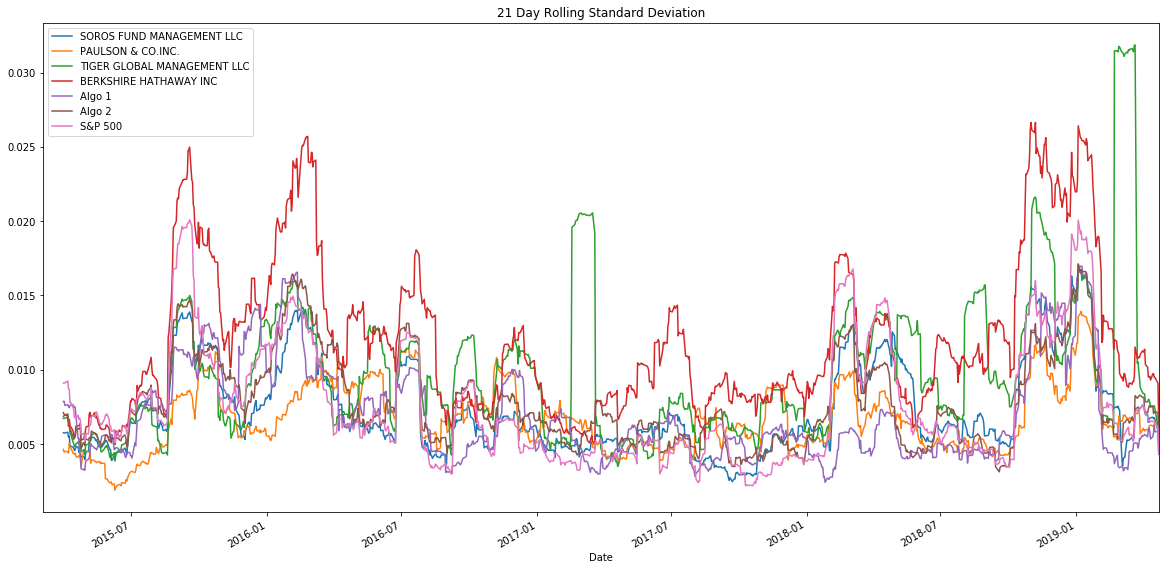

In [39]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
portfolio_sma_21= combined_returns.rolling(window=21).std().plot(title='21 Day Rolling Standard Deviation', figsize=(20,10))

In [40]:
# Construct a correlation table
# YOUR CODE HERE
correlation = combined_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


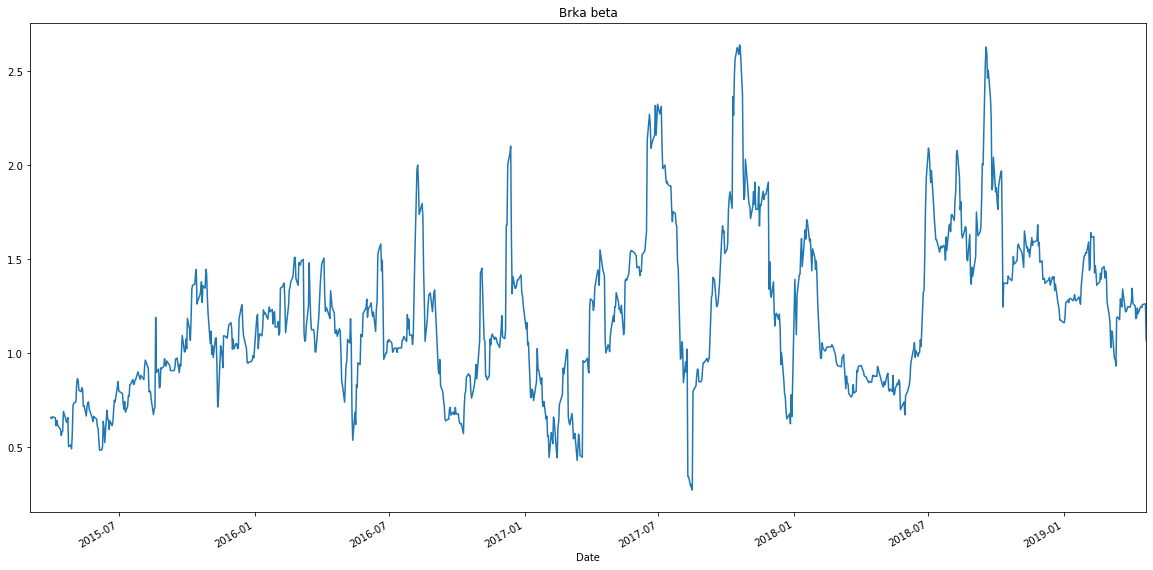

In [56]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
brka_covariance = combined_returns['BERKSHIRE HATHAWAY INC'].cov(combined_returns['S&P 500'])
brka_covariance
variance = combined_returns['S&P 500'].var()
variance
brka_beta = brka_covariance / variance
brka_beta
rolling_brka_covariance = combined_returns['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(combined_returns['S&P 500'])
rolling_variance = combined_returns['S&P 500'].rolling(window=21).var()
rolling_brka_beta = rolling_brka_covariance / rolling_variance
rolling_brka_beta.plot(figsize=(20,10), title='Brka beta')

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

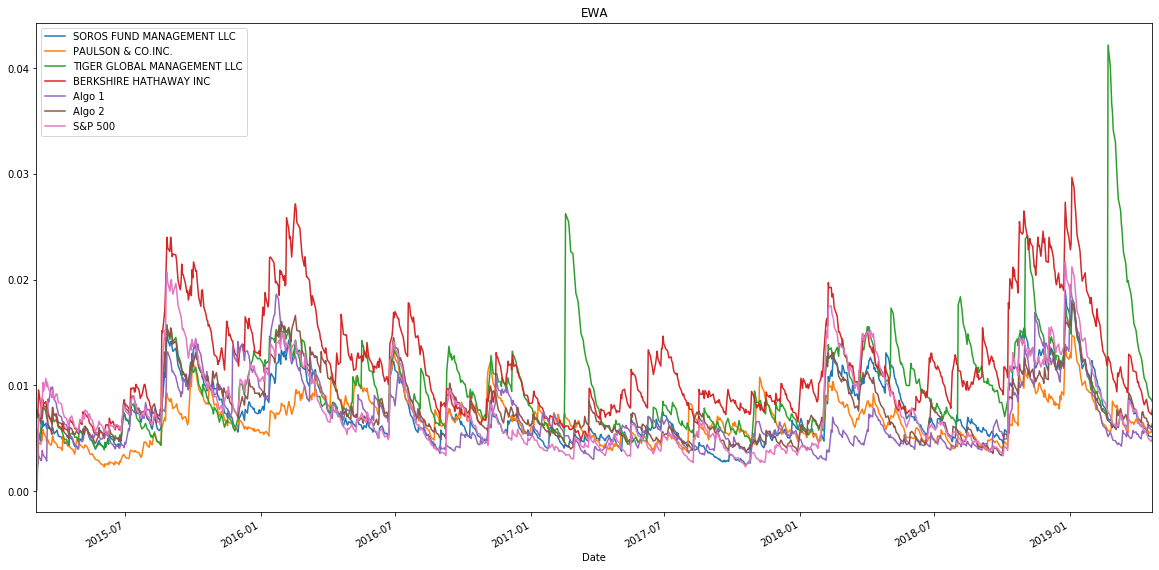

In [57]:
# (OPTIONAL) YOUR CODE HERE
portfolio_ewm_21= combined_returns.ewm(com=10).std().plot(title='EWA', figsize=(20,10))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [58]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (combined_returns.mean()*252/ annualized_std)
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

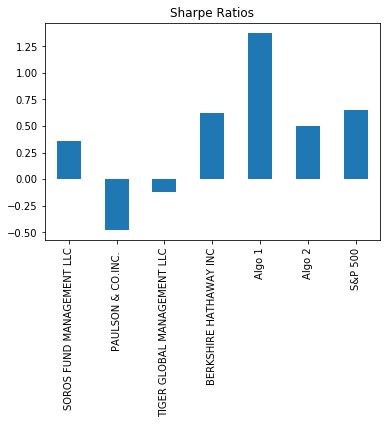

In [59]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [60]:
# Read the first stock
# YOUR CODE HERE
ba_csv = Path("Resources/BA.csv")
# YOUR CODE HERE
ba_data = pd.read_csv(ba_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
ba_data.head()

,Close
Date,
2015-03-03,155.57
2015-03-04,154.35
2015-03-05,154.47
2015-03-06,153.12
2015-03-09,154.75


In [66]:
# Rename Column BA
ba_data = ba_data.rename(columns={'Close':'BA'})
ba_data.head()

,BA
Date,
2015-03-03,155.57
2015-03-04,154.35
2015-03-05,154.47
2015-03-06,153.12
2015-03-09,154.75


In [71]:
# Read the second stock
# YOUR CODE HERE
nflx_csv = Path("Resources/NFLX.csv")
# YOUR CODE HERE
nflx_data = pd.read_csv(nflx_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
nflx_data.head()

,Close
Date,
2015-03-03,67.82
2015-03-04,67.11
2015-03-05,66.81
2015-03-06,64.87
2015-03-09,63.66


In [72]:
# Rename Column NFLX
nflx_data = nflx_data.rename(columns={'Close':'NFLX'})
nflx_data.head()

,NFLX
Date,
2015-03-03,67.82
2015-03-04,67.11
2015-03-05,66.81
2015-03-06,64.87
2015-03-09,63.66


In [62]:
# Read the third stock
# YOUR CODE HERE
mcd_csv = Path("Resources/MCD.csv")
# YOUR CODE HERE
mcd_data = pd.read_csv(mcd_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
mcd_data.head()

,Close
Date,
2015-03-03,99.74
2015-03-04,100.25
2015-03-05,99.11
2015-03-06,97.13
2015-03-09,97.71


In [68]:
# Rename Column MCD
mcd_data = mcd_data.rename(columns={'Close':'MCD'})
mcd_data.head()

,MCD
Date,
2015-03-03,99.74
2015-03-04,100.25
2015-03-05,99.11
2015-03-06,97.13
2015-03-09,97.71


In [76]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
my_port_data = pd.concat([ba_data, nflx_data, mcd_data], axis='columns',join='inner')
my_port_data.head()

,BA,NFLX,MCD
Date,,,
2015-03-03,155.57,67.82,99.74
2015-03-04,154.35,67.11,100.25
2015-03-05,154.47,66.81,99.11
2015-03-06,153.12,64.87,97.13
2015-03-09,154.75,63.66,97.71


In [79]:
# Drop Nulls
# YOUR CODE HERE
my_port_data.isnull().sum()
my_port_data.dropna(inplace=True)
my_port_data.isnull().sum()

BA      0
NFLX    0
MCD     0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [81]:
#daily returns
my_daily_returns = my_port_data.pct_change()
my_daily_returns.head()


,BA,NFLX,MCD
Date,,,
2015-03-03,NaN,NaN,NaN
2015-03-04,-0.007842,-0.010469,0.005113
2015-03-05,0.000777,-0.004470,-0.011372
2015-03-06,-0.008740,-0.029038,-0.019978
2015-03-09,0.010645,-0.018653,0.005971


In [84]:
# drop nulls
my_daily_returns.isnull().sum()
my_daily_returns.dropna(inplace=True)
my_daily_returns.isnull().sum()

BA      0
NFLX    0
MCD     0
dtype: int64

In [85]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
my_port_returns = my_daily_returns.dot(weights)
my_port_returns.head()

Date
2015-03-04   -0.004399
2015-03-05   -0.005021
2015-03-06   -0.019252
2015-03-09   -0.000679
2015-03-10   -0.017770
dtype: float64

## Join your custom portfolio returns to the DataFrame that contains all of the portfolio returns

In [87]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
join_portfolio = pd.concat([combined_returns, my_port_returns], axis='columns',join='inner')
join_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.004399
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,-0.005021
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.019252
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,-0.000679
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961,-0.017770


In [89]:
# Rename Column 0
join_portfolio = join_portfolio.rename(columns={0:'Custom'})
join_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.004399
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,-0.005021
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.019252
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,-0.000679
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961,-0.017770


In [91]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
join_portfolio.dropna(inplace=True)
join_portfolio.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
Custom                         0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [92]:
# Risk
# YOUR CODE HERE
# Daily Standard Deviations
join_port_daily_std = join_portfolio.std()
join_port_daily_std.head(10)

SOROS FUND MANAGEMENT LLC      0.007899
PAULSON & CO.INC.              0.007025
TIGER GLOBAL MANAGEMENT LLC    0.010899
BERKSHIRE HATHAWAY INC         0.012923
Algo 1                         0.007623
Algo 2                         0.008346
S&P 500                        0.008556
Custom                         0.013125
dtype: float64

In [95]:
# Determine which portfolios are riskier than the S&P 500
join_risky_port = join_port_daily_std.where(join_port_daily_std < 0.008557, 'riskier')
join_risky_port

SOROS FUND MANAGEMENT LLC      0.00789904
PAULSON & CO.INC.               0.0070249
TIGER GLOBAL MANAGEMENT LLC       riskier
BERKSHIRE HATHAWAY INC            riskier
Algo 1                         0.00762343
Algo 2                          0.0083462
S&P 500                         0.0085565
Custom                            riskier
dtype: object

In [98]:
# Annualized standard deviation (252 trading days)
join_annualized_std = join_port_daily_std * np.sqrt(252)
join_annualized_std.head(10)

SOROS FUND MANAGEMENT LLC      0.125393
PAULSON & CO.INC.              0.111517
TIGER GLOBAL MANAGEMENT LLC    0.173019
BERKSHIRE HATHAWAY INC         0.205146
Algo 1                         0.121018
Algo 2                         0.132492
S&P 500                        0.135830
Custom                         0.208347
dtype: float64

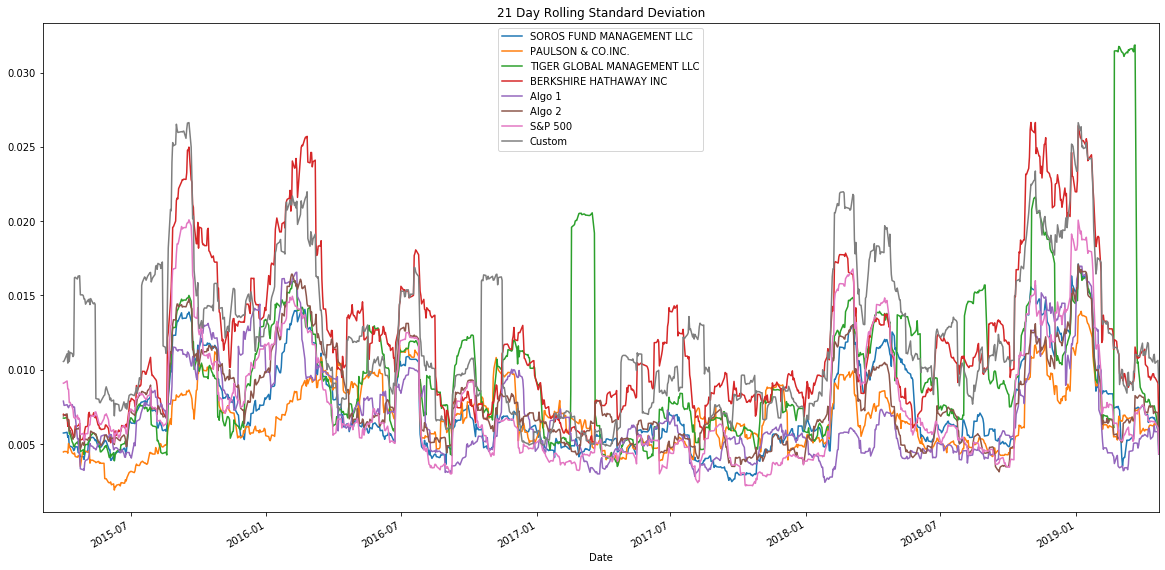

In [105]:
# Rolling
# YOUR CODE HERE
join_sma_21= join_portfolio.rolling(window=21).std().plot(title='21 Day Rolling Standard Deviation', figsize=(20,10))

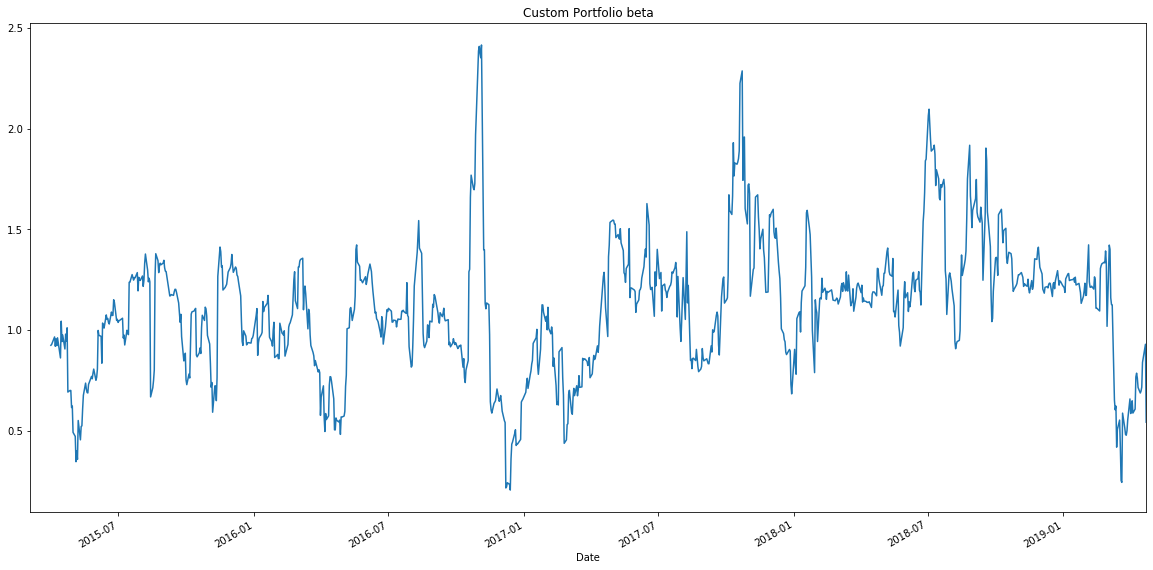

In [107]:
# Beta
# YOUR CODE HERE
rolling_custom_covariance = join_portfolio['Custom'].rolling(window=21).cov(join_portfolio['S&P 500'])
rolling_custom_variance = join_portfolio['S&P 500'].rolling(window=21).var()
rolling_custom_beta = rolling_custom_covariance / rolling_custom_variance
rolling_custom_beta.plot(figsize=(20,10), title='Custom Portfolio beta')

In [108]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
join_sharpe_ratios = (join_portfolio.mean()*252/ join_annualized_std)
join_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.359034
PAULSON & CO.INC.             -0.473108
TIGER GLOBAL MANAGEMENT LLC   -0.120425
BERKSHIRE HATHAWAY INC         0.629941
Algo 1                         1.383268
Algo 2                         0.503342
S&P 500                        0.656761
Custom                         1.483788
dtype: float64

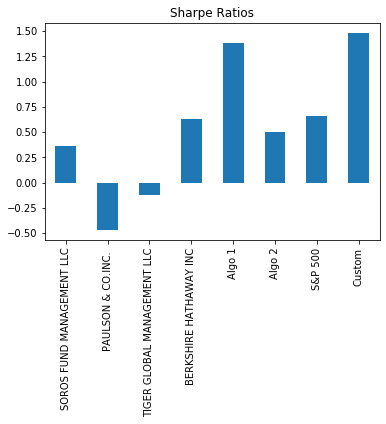

In [109]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
join_sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

## Include correlation analysis to determine which stocks (if any) are correlated

In [111]:
# YOUR CODE HERE
join_correlation = join_portfolio.corr()
join_correlation
#Custom portfolio is highly correlated to S&P 500 and Bershire Hathaway Inc.

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.699961,0.561246,0.754385,0.321175,0.826869,0.837908,0.619101
PAULSON & CO.INC.,0.699961,1.000000,0.434551,0.545465,0.268692,0.678214,0.669612,0.465148
TIGER GLOBAL MANAGEMENT LLC,0.561246,0.434551,1.000000,0.424465,0.164384,0.507414,0.624023,0.424738
BERKSHIRE HATHAWAY INC,0.754385,0.545465,0.424465,1.000000,0.291912,0.688112,0.751297,0.717305
Algo 1,0.321175,0.268692,0.164384,0.291912,1.000000,0.288214,0.279366,0.209570
Algo 2,0.826869,0.678214,0.507414,0.688112,0.288214,1.000000,0.858828,0.600227
S&P 500,0.837908,0.669612,0.624023,0.751297,0.279366,0.858828,1.000000,0.728971
Custom,0.619101,0.465148,0.424738,0.717305,0.209570,0.600227,0.728971,1.000000
